## us700birm

2020-09-06 02:59:16 (UTC)

17.156°S 167.532°E

10.0 km depth

### Imports

In [29]:
from cioppy import Cioppy
import requests
import json
import datetime
from shapely.wkt import loads
from helpers import *
import matplotlib.pyplot as plt
from PIL import Image

In [22]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## USGS API 

Get information about the event using the USGS API

In [3]:
usgs_api = 'https://earthquake.usgs.gov/fdsnws/event/1/query' 

Set the event id:

In [4]:
eq_id = 'us7000birm'

In [5]:
payload = {'eventid': eq_id,
           'format': 'geojson'}
        
r = requests.get(usgs_api, params = payload)

r.status_code

200

In [6]:
record = json.loads(r.content.decode('utf-8'))

Check if the event has a shakemap

In [7]:
'shakemap' in record['properties']['types'].split(',')

True

A Python class for the event to ease accessing the information 

In [8]:
class EarthQuake:
    
    def __init__(self, record):
    
        self.wkt = 'POINT({} {})'.format(record['geometry']['coordinates'][0], 
                                         record['geometry']['coordinates'][1])
        
        self.depth = record['geometry']['coordinates'][2]
        
        self.date = datetime.datetime.fromtimestamp(record['properties']['time'] /1000.0).isoformat() + 'Z'
        
        self.updated = datetime.datetime.fromtimestamp(record['properties']['updated'] /1000.0).isoformat() + 'Z'
        
        self.url = str(record['properties']['url'])
        
        self.title = str(record['properties']['title'])

        try:
            self.abstract = self.title + '. ' + str(record['properties']['products']['impact-text'][0]['contents']['']['bytes']).rstrip()
        except:
            self.abstract = self.title
            
        self.id = str(record['id'])
        
        self.quakeml = requests.get('https://earthquake.usgs.gov/fdsnws/event/1/query?eventid={}&format=quakeml'.format(self.id)).content

        if 'shakemap' in record['properties']['types'].split(','):
            
            # Intensity Contours - Contours of macroseismic intensity.
            self.mmi = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_mmi.json']['url']).content.decode('utf-8'))
            
            # Intensity Contours (Legacy Naming) - Contours of macroseismic intensity.
            self.mi = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_mi.json']['url']).content.decode('utf-8'))
            
            # PGA Contours - Contours of GREATER_OF_TWO_HORIZONTAL peak ground acceleration (%g).
            self.pga = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_pga.json']['url']).content.decode('utf-8'))
            
            # PGV Contours - Contours of GREATER_OF_TWO_HORIZONTAL peak ground velocity (cm/s).            
            self.pgv = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_pgv.json']['url']).content.decode('utf-8'))
            
            # SA(0.3) Contours - Contours of GREATER_OF_TWO_HORIZONTAL 5% damped 0.3 sec spectral acceleration (%g).
            self.psa0p3 = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_psa0p3.json']['url']).content.decode('utf-8'))
            
            # SA(1.0) Contours - Contours of GREATER_OF_TWO_HORIZONTAL 5% damped 1.0 sec spectral acceleration (%g).
            self.psa1p0 = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_psa1p0.json']['url']).content.decode('utf-8'))
            
            # SA(3.0) Contours - Contours of GREATER_OF_TWO_HORIZONTAL 5% damped 3.0 sec spectral acceleration (%g).
            self.psa3p0 = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_psa3p0.json']['url']).content.decode('utf-8'))
            


In [9]:
eq = EarthQuake(record)

Access the event peak ground velocity

In [10]:
eq.pgv

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'value': 0.2,
    'units': 'cms',
    'color': '#a7dfff',
    'weight': 4},
   'geometry': {'type': 'MultiLineString',
    'coordinates': [[[165.516667, -15.406626],
      [165.541614, -15.404724],
      [165.684014, -15.266594],
      [165.697556, -15.233333]],
     [[169.366671, -15.233333],
      [169.373355, -15.258279],
      [169.388507, -15.274909],
      [169.475052, -15.357235],
      [169.491684, -15.357472]],
     [[165.627222, -19.025018],
      [165.623717, -19.008388],
      [165.541614, -18.926611],
      [165.516667, -18.925676]],
     [[169.491684, -18.973211],
      [169.475052, -18.974018],
      [169.440384, -19.008388],
      [169.436879, -19.025018]]]}},
  {'type': 'Feature',
   'properties': {'value': 0.5,
    'units': 'cms',
    'color': '#95eeff',
    'weight': 4},
   'geometry': {'type': 'MultiLi

## Discover the data pipeline data items

The data pipeline processess the Sentinel-1 SLC pairs with DIAPASON and DLR's InSAR-Browse

The entry point to access these products is the set of the data processing pipelines data items in 'out' status

In [11]:
eq_id = 'us7000birm'

In [12]:
search_params = {}

search_params['cat'] = '[{},dataitem,out]'.format(eq_id)
search_params['count'] = '100'

In [13]:
ciop = Cioppy()

In [14]:
data_items = ciop.search(end_point='https://catalog.terradue.com/gep-usgs-pager-0001/search', 
                         params=search_params,
                         output_fields='identifier,title')

In [15]:
data_items

[{'identifier': '3f8e4860e754e909dcc2aac7a33ba7d9',
  'title': '[DI Out] DIAPASON coseismic pair [master:2020-09-03T07:12:56.9810000Z/slave:2020-09-09T07:13:37.3300000Z]'},
 {'identifier': 'b7b571e8bed143685cef71c6a016d5ca',
  'title': '[DI Out] DLR InSAR Browse coseismic pair [master:2020-09-03T07:12:56.9810000Z/slave:2020-09-09T07:13:37.3300000Z]'},
 {'identifier': 'b5b576241fd704249f783fd071d64d80',
  'title': '[DI Out] DIAPASON coseismic pair [master:2020-09-02T07:21:43.1720000Z/slave:2020-09-14T07:21:43.6590000Z]'},
 {'identifier': 'a03da7e11b09090462a23f5c713a51a9',
  'title': '[DI Out] DLR InSAR Browse coseismic pair [master:2020-09-01T18:20:54.3120000Z/slave:2020-09-13T18:20:54.8280000Z]'}]

### Discover the results produced by the data items

In [16]:
results = []

for data_item in data_items: 
    
    print(data_item['identifier'])
    
    search_params = {}

    search_params['uid'] = data_item['identifier']
    
    data_item_results  = ciop.search(end_point='https://catalog.terradue.com/gep-usgs-pager-0001/search', 
                                     params=search_params,
                                     output_fields='link:results')
    
    search_results = ciop.search(end_point=data_item_results[0]['link:results'], 
                     params={},
                     output_fields='title,startdate,enddate,enclosure')
    
    for result in search_results:
        
        # get only the DIAPASON results:
        if 'DIAPASON' in result['title']:
            
            results.append({'title': result['title'], 
                            'enclosure': result['enclosure'], 
                            'type': 'data'})
            
            # add the RGB composites 
            results.append({'title': result['title'], 
                            'enclosure': result['enclosure'].replace('.tiff', '.rgb.tiff'),
                            'type': 'rgb'})

3f8e4860e754e909dcc2aac7a33ba7d9
b7b571e8bed143685cef71c6a016d5ca
b5b576241fd704249f783fd071d64d80
a03da7e11b09090462a23f5c713a51a9


In [17]:
results

[{'title': 'DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Phase - 2020-09-03T07:12:57 2020-09-09T07:13:39',
  'enclosure': 'https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/5020ed82-f57e-11ea-9b4b-0242ac110002/0009113-200723125048137-oozie-oozi-W/pha_23207_34278_ortho.tiff',
  'type': 'data'},
 {'title': 'DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Phase - 2020-09-03T07:12:57 2020-09-09T07:13:39',
  'enclosure': 'https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/5020ed82-f57e-11ea-9b4b-0242ac110002/0009113-200723125048137-oozie-oozi-W/pha_23207_34278_ortho.rgb.tiff',
  'type': 'rgb'},
 {'title': 'DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Coherence - 2020-09-03T07:12:57 2020-09-09T07:13:39',
  'enclosure': 'https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dc

## Plot the phase

In [18]:
results[1]['enclosure']

'https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/5020ed82-f57e-11ea-9b4b-0242ac110002/0009113-200723125048137-oozie-oozi-W/pha_23207_34278_ortho.rgb.tiff'

In [19]:
img_data = vsi_download(results[1]['enclosure'])

DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Phase - 2020-09-03T07:12:57 2020-09-09T07:13:39
(5370, 5400, 1)
DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Phase - 2020-09-03T07:12:57 2020-09-09T07:13:39
(5370, 5400, 4)
DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Coherence - 2020-09-03T07:12:57 2020-09-09T07:13:39
(5370, 5400, 1)


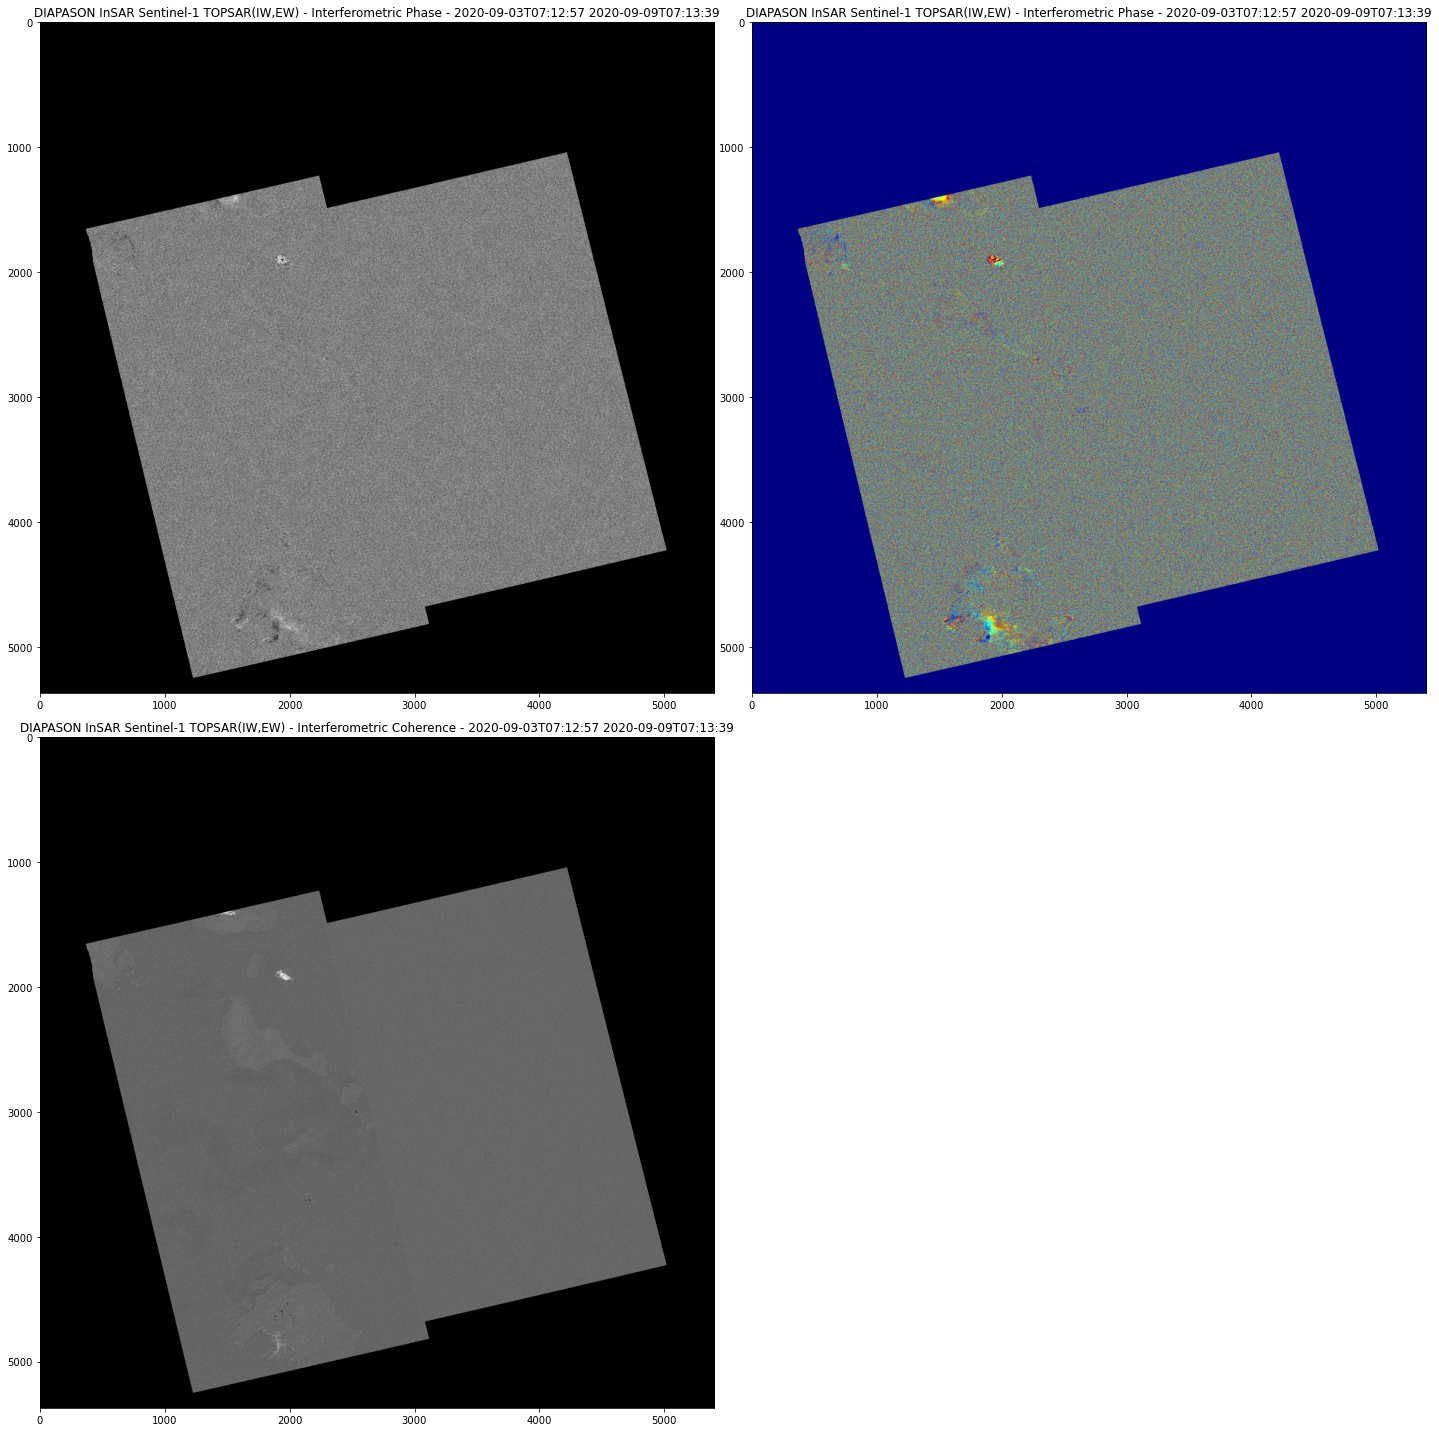

In [30]:
fig = plt.figure(figsize=(20,20))

i=1
for index, result in enumerate(results):
   
    print (result['title'])
    
    img_data = vsi_download(result['enclosure'])
    #, 
    #                   aoi, 
    #                   username, 
    #                   api_key)

    print(img_data.shape)
    
    a=fig.add_subplot(2, 2, 0+i)
    a.set_title(result['title'])
    width = 12
    height = 12
   
    if img_data.shape[2] == 4:
        
        data = np.dstack((img_data[:,:,0], 
                          img_data[:,:,1],
                          img_data[:,:,2])).astype(np.uint8) 

       
        #plt.figure(figsize=(width, height))
        img = Image.fromarray(data)
        imgplot = plt.imshow(img)

    else:
        
        data = img_data
    
        imgplot = plt.imshow(data.reshape(data.shape[0],
                                          data.shape[1]), 
                             cmap=plt.cm.gray) #, vmin=-5, vmax=15)

    i = i+1
    
    # stop plotting the results after a few images
    if i == 4: break   
plt.tight_layout()
fig = plt.gcf()
plt.show()

fig.clf()
plt.close()